## 📦 Load and Preview the Dataset

In this section, we load the Superstore dataset and check its structure to understand the data types, column names, and initial values.


In [31]:
# Import necessary library
import pandas as pd

# Load the dataset with correct encoding
df = pd.read_csv('/kaggle/input/superstore-dataset-final/Sample - Superstore.csv', encoding='latin1')

# Display first few rows
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## 🧹 Data Cleaning and Feature Engineering

We will now clean the dataset by:
- Converting date columns to datetime format
- Removing missing or irrelevant records
- Creating new columns for Year and Month for time-based analysis

In [32]:
# Convert 'Order Date' and 'Ship Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Drop any rows where critical data is missing (Sales, Profit)
df.dropna(subset=['Sales', 'Profit', 'Order Date'], inplace=True)

# Create new time-based features
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.to_period('M')  # For time series grouping

## 📈 Monthly Sales Trends

Let’s visualize the monthly sales to identify trends over time.  
This helps us see seasonal patterns and overall business growth.

In [33]:
import plotly.express as px

# Aggregate monthly sales and profit
monthly_sales = df.groupby('Order Month').agg(
    total_sales=('Sales', 'sum'),
    total_profit=('Profit', 'sum')
).reset_index()

# Convert Period to Timestamp for plotting
monthly_sales['Order Month'] = monthly_sales['Order Month'].dt.to_timestamp()

# Line chart with Plotly
fig_monthly = px.line(
    monthly_sales, x='Order Month', y='total_sales',
    title='📊 Monthly Sales Trend',
    labels={'total_sales': 'Total Sales', 'Order Month': 'Month'}
)

fig_monthly.show()

## 🌍 Profit and Sales by Region

Let’s analyze which regions are contributing most to the overall sales and profit.  
This will help identify strong vs weak geograp

In [34]:
# Aggregate sales and profit by region
region_perf = df.groupby('Region').agg(
    total_sales=('Sales', 'sum'),
    total_profit=('Profit', 'sum')
).reset_index()

# Visualize with Plotly heatmap (color intensity shows profit)
import plotly.express as px

fig_region = px.density_heatmap(
    region_perf,
    x='Region',
    y='total_profit',
    z='total_sales',
    histfunc='avg',
    title='🗺️ Heatmap of Sales vs Profit by Region',
    labels={'total_sales': 'Sales', 'total_profit': 'Profit'}
)

fig_region.show()

## 🧺 Sales and Profit by Product Category

Now we analyze which product categories are the most profitable and have the highest sales.  
This can help prioritize inventory, marketing, and pricing strategies.

In [35]:
# Group by Category and aggregate sales and profit
cat_perf = df.groupby('Category').agg(
    total_sales=('Sales', 'sum'),
    total_profit=('Profit', 'sum')
).reset_index()

# Sort by sales
cat_perf.sort_values(by='total_sales', ascending=False, inplace=True)

# Visualize with Plotly bar chart
import plotly.express as px

fig_cat = px.bar(
    cat_perf,
    x='Category',
    y='total_sales',
    color='total_profit',
    color_continuous_scale='Blues',
    title='📦 Sales and Profit by Product Category',
    labels={'total_sales': 'Total Sales', 'total_profit': 'Total Profit'}
)

fig_cat.show()

## 💸 Discount vs Profit

Let’s explore the relationship between discount rates and profitability.  
This helps us understand whether giving discounts truly drives profit or causes losses.

In [36]:
# Visualize Discount vs Profit using scatter plot
import plotly.express as px

fig_disc = px.scatter(
    df, x='Discount', y='Profit',
    title='📉 Impact of Discount on Profit',
    trendline='ols',
    opacity=0.6,
    labels={'Discount': 'Discount Rate', 'Profit': 'Profit'}
)

fig_disc.show()

## 🧩 Sales and Profit by Sub-Category

Let’s drill down into the product hierarchy and analyze performance at the Sub-Category level.
This can help businesses prioritize top-performing items and phase out loss-making ones.

In [37]:
# Group by Sub-Category
subcat_perf = df.groupby('Sub-Category').agg(
    total_sales=('Sales', 'sum'),
    total_profit=('Profit', 'sum')
).reset_index()

# Sort by sales
subcat_perf = subcat_perf.sort_values(by='total_sales', ascending=False)

# Bar chart
import plotly.express as px

fig_subcat = px.bar(
    subcat_perf,
    x='Sub-Category',
    y='total_sales',
    color='total_profit',
    color_continuous_scale='Tealrose',
    title='🧩 Sales & Profit by Sub-Category',
    labels={'total_sales': 'Total Sales', 'total_profit': 'Total Profit'}
)

fig_subcat.update_layout(xaxis_tickangle=-45)
fig_subcat.show()

## 🗺️ Sales Distribution by State (USA Map)

This map shows how sales are distributed across different states in the US.  
It helps visualize regional performance and identify high and low performing areas.

In [38]:
# Aggregate sales per state
state_sales = df.groupby('State').agg(
    total_sales=('Sales', 'sum')
).reset_index()

# Load built-in Plotly US states map
import plotly.express as px

fig_map = px.choropleth(
    state_sales,
    locations='State',
    locationmode='USA-states',
    color='total_sales',
    scope='usa',
    color_continuous_scale='Viridis',
    title='🗺️ Total Sales by US State'
)

fig_map.show()

## 🚚 Shipping Delay Analysis

We calculate how many days it takes for each order to ship.  
This analysis helps us detect delays and monitor shipping efficiency across different regions or modes.

In [39]:
# Calculate shipping delay in days
df['Shipping Delay'] = (df['Ship Date'] - df['Order Date']).dt.days

# Check for negative or invalid values (just in case)
df = df[df['Shipping Delay'] >= 0]

# Summary statistics
df['Shipping Delay'].describe()


count    9994.000000
mean        3.958175
std         1.747567
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: Shipping Delay, dtype: float64

## 🚢 Performance by Ship Mode

Let’s compare how different shipping modes perform in terms of sales, profit, and shipping delay.  
This helps identify the most efficient and cost-effective shipping strategies.

In [40]:
# Group by Ship Mode
ship_mode_perf = df.groupby('Ship Mode').agg(
    avg_delay=('Shipping Delay', 'mean'),
    total_sales=('Sales', 'sum'),
    total_profit=('Profit', 'sum'),
    count_orders=('Order ID', 'count')
).reset_index()


### 📊 Compare Ship Modes (Bar Chart)

In [41]:
import plotly.express as px

fig_ship = px.bar(
    ship_mode_perf,
    x='Ship Mode',
    y='avg_delay',
    color='total_profit',
    text='count_orders',
    title='🚚 Average Shipping Delay by Ship Mode',
    labels={
        'avg_delay': 'Avg Shipping Delay (Days)',
        'total_profit': 'Total Profit',
        'count_orders': 'Number of Orders'
    }
)

fig_ship.update_traces(textposition='outside')
fig_ship.show()


## 🧠 Correlation Heatmap

Let’s examine the correlation between numerical features such as Sales, Profit, Discount, Quantity, and Shipping Delay.  
This will help detect strong or weak linear relationships that may affect modeling or business decisions.

In [42]:
# Select numerical features only
num_cols = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Delay']
corr_matrix = df[num_cols].corr()

### 🔥 Visualize the Correlation Matrix

/tmp/ipykernel_36/3452942739.py:17: UserWarning:

Glyph 128208 (\N{TRIANGULAR RULER}) missing from current font.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128208 (\N{TRIANGULAR RULER}) missing from current font.



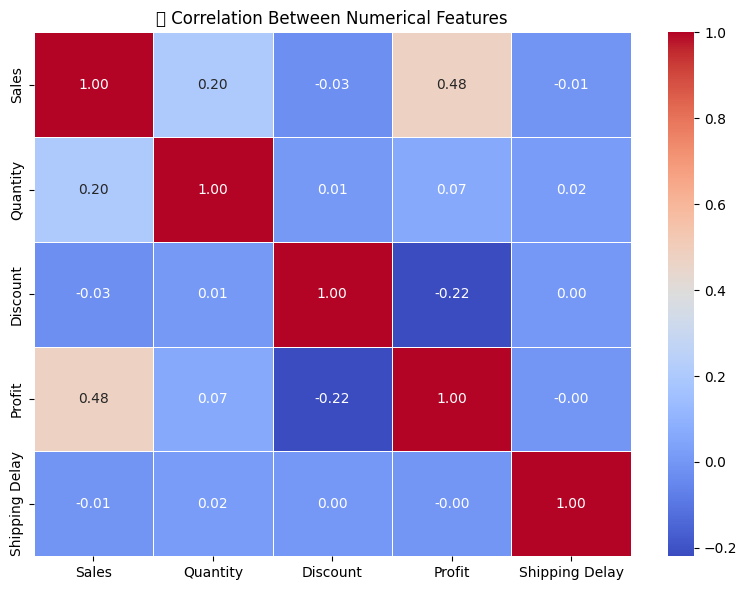

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot size
plt.figure(figsize=(8, 6))

# Create heatmap
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)

plt.title('📐 Correlation Between Numerical Features')
plt.tight_layout()
plt.show()

## 💰 Profit Margin per Order

Let’s calculate the **profit margin** of each order, defined as the percentage of profit over sales.  
This metric helps identify which product lines or customer segments bring the highest value.

In [44]:
# Create profit margin column
df['Profit Margin (%)'] = (df['Profit'] / df['Sales']) * 100

# Remove outliers for better visualization (optional)
df_filtered = df[(df['Profit Margin (%)'] > -200) & (df['Profit Margin (%)'] < 200)]

### 📊 Distribution of Profit Margin

In [45]:
import plotly.express as px

fig_margin = px.histogram(
    df_filtered,
    x='Profit Margin (%)',
    nbins=50,
    title='📊 Distribution of Profit Margin per Order',
    labels={'Profit Margin (%)': 'Profit Margin (%)'}
)

fig_margin.show()


## 🔻 Identifying Loss-Making Orders and Products

This analysis highlights the orders and sub-categories that caused negative profit.  
It helps identify which products or strategies are harming profitability.

In [46]:
# Filter for loss-making records
loss_df = df[df['Profit'] < 0]

# Group by Sub-Category to see which ones lose most money
loss_by_subcat = loss_df.groupby('Sub-Category').agg(
    total_loss=('Profit', 'sum'),
    loss_orders=('Order ID', 'count')
).reset_index().sort_values(by='total_loss')

### 📊 Visualize Sub-Categories with Most Loss

In [47]:
import plotly.express as px

fig_loss = px.bar(
    loss_by_subcat,
    x='Sub-Category',
    y='total_loss',
    text='loss_orders',
    color='total_loss',
    color_continuous_scale='Reds',
    title='❌ Loss-Making Sub-Categories (Negative Profit)',
    labels={'total_loss': 'Total Loss', 'loss_orders': 'Number of Loss Orders'}
)

fig_loss.update_traces(textposition='outside')
fig_loss.update_layout(xaxis_tickangle=-45)
fig_loss.show()


## 📈 Cumulative Sales Growth

We calculate the cumulative sales over time to visualize business growth.  
This helps stakeholders understand long-term revenue trends and performance milestones.

In [48]:
# Sort dataset by date
df_sorted = df.sort_values('Order Date')

# Group by date and sum sales
daily_sales = df_sorted.groupby('Order Date').agg(
    daily_sales=('Sales', 'sum')
).reset_index()

# Calculate cumulative sales
daily_sales['Cumulative Sales'] = daily_sales['daily_sales'].cumsum()

### 📊 Visualize Cumulative Sales Over Time

In [49]:
import plotly.express as px

fig_cum = px.line(
    daily_sales,
    x='Order Date',
    y='Cumulative Sales',
    title='📈 Cumulative Sales Over Time',
    labels={'Order Date': 'Date', 'Cumulative Sales': 'Total Sales (Cumulative)'}
)

fig_cum.show()


## 👥 Average Order Value (AOV) by Customer Segment

We calculate the average order value for each customer segment.  
This shows which segment spends the most per order and helps guide targeting strategies.

In [50]:
# Group by Segment and calculate AOV
aov_segment = df.groupby('Segment').agg(
    total_sales=('Sales', 'sum'),
    order_count=('Order ID', 'nunique')
).reset_index()

# Calculate AOV
aov_segment['Average Order Value'] = aov_segment['total_sales'] / aov_segment['order_count']

### 📊 Visualize AOV by Segment

In [51]:
import plotly.express as px

fig_aov = px.bar(
    aov_segment,
    x='Segment',
    y='Average Order Value',
    color='Average Order Value',
    color_continuous_scale='Purples',
    title='📋 Average Order Value by Customer Segment',
    labels={'Average Order Value': 'AOV ($)'}
)

fig_aov.show()

## 🏆 Top 10 Customers by Total Spend

Let’s identify the top 10 customers who spent the most money.  
This is crucial for relationship management, loyalty programs, and targeted VIP marketing.

In [52]:
# Group by Customer and calculate total spend
top_customers = df.groupby(['Customer ID', 'Customer Name']).agg(
    total_sales=('Sales', 'sum'),
    total_orders=('Order ID', 'nunique'),
    total_profit=('Profit', 'sum')
).reset_index()

# Sort by total sales
top_customers = top_customers.sort_values(by='total_sales', ascending=False).head(10)

### 📊 Visualize Top 10 Customers

In [53]:
import plotly.express as px

fig_topcust = px.bar(
    top_customers,
    x='Customer Name',
    y='total_sales',
    text='total_orders',
    color='total_profit',
    color_continuous_scale='Cividis',
    title='💎 Top 10 Customers by Sales',
    labels={'total_sales': 'Total Sales', 'total_orders': 'Order Count', 'total_profit': 'Profit'}
)

fig_topcust.update_traces(textposition='outside')
fig_topcust.update_layout(xaxis_tickangle=-45)
fig_topcust.show()